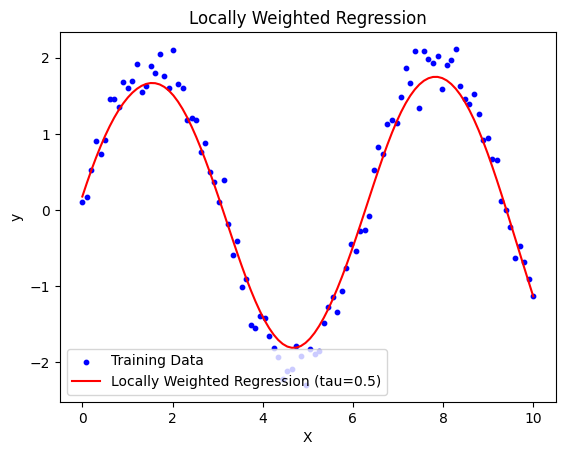

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Locally Weighted Regression Function
def locally_weighted_regression(X, y, query_point, tau):
    """
    Perform Locally Weighted Regression for a single query point.

    Parameters:
    - X: Training features (m x 1 matrix for one feature or m x n for multiple features)
    - y: Target values (m x 1 vector)
    - query_point: The point at which to make the prediction
    - tau: Bandwidth parameter controlling the weight decay

    Returns:
    - y_pred: Predicted value for the query point
    """
    # Add intercept term to X
    X = np.c_[np.ones(X.shape[0]), X]  # Add bias term to X
    query_point = np.r_[1, query_point]  # Add bias term to query point
    
    # Compute weights using the Gaussian kernel
    weights = np.exp(-np.sum((X - query_point) ** 2, axis=1) / (2 * tau ** 2))
    W = np.diag(weights)
    
    # Compute theta using weighted normal equation
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    
    # Predict the output for the query point
    y_pred = query_point @ theta
    return y_pred

# Generate Example Data
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2 * np.sin(X) + np.random.normal(0, 0.2, X.shape)  # Non-linear data

# Predict using Locally Weighted Regression
tau = 0.5  # Bandwidth parameter
predictions = np.array([locally_weighted_regression(X, y, query_point, tau) for query_point in X])

# Plot the Results
plt.scatter(X, y, label="Training Data", color="blue", s=10)
plt.plot(X, predictions, label=f"Locally Weighted Regression (tau={tau})", color="red")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Locally Weighted Regression")
plt.show()
